<a href="https://colab.research.google.com/github/arjun372/NE795-SciML/blob/main/Homework%204/Homework_4_Problem_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 - Problem 5 - Sampling a Banana Distribution using MCMC DRAM

In [22]:
import numpy as np

def banana_function(x, b):
    """
    The banana-shaped distribution function.
    :param x: The current position in the parameter space (numpy array).
    :param b: The 'bananacity' parameter that controls the curvature.
    :return: The log of the probability density at position x.
    """
    return -0.5 * (x[0]**2 / 100.0 + (x[1] + b*x[0]**2 - 100*b)**2)

def banana_density(x, y, b):
    """
    The banana-shaped distribution density function.
    :param x: x-coordinate in the parameter space.
    :param y: y-coordinate in the parameter space.
    :param b: The 'bananacity' parameter that controls the curvature.
    :return: The probability density at position (x, y).
    """
    return np.exp(-0.5 * (x**2 / 100.0 + (y + b*x**2 - 100*b)**2))

def proposal(x, cov):
    """
    Proposal distribution that generates a new sample.
    :param x: The current position in the parameter space (numpy array).
    :param cov: The covariance matrix for the proposal distribution.
    :return: A new proposed position in the parameter space.
    """
    return np.random.multivariate_normal(x, cov)

def acceptance_probability(x_new, x_old, b, cov):
    """
    Calculate the acceptance probability for the new sample.
    :param x_new: The proposed new position in the parameter space.
    :param x_old: The current position in the parameter space.
    :param b: The 'bananacity' parameter.
    :param cov: The covariance matrix for the proposal distribution.
    :return: The acceptance probability.
    """
    log_p_new = banana_function(x_new, b)
    log_p_old = banana_function(x_old, b)
    log_q_new = -0.5 * np.dot(x_old - x_new, np.linalg.solve(cov, x_old - x_new))
    log_q_old = -0.5 * np.dot(x_new - x_old, np.linalg.solve(cov, x_new - x_old))
    return min(1, np.exp(log_p_new - log_p_old + log_q_new - log_q_old))

def dram_mcmc(n_samples, b, initial_x, initial_cov):
    """
    The DRAM MCMC sampling method.
    :param n_samples: The number of samples to generate.
    :param b: The 'bananacity' parameter for the banana distribution.
    :param initial_x: The initial position in the parameter space.
    :param initial_cov: The initial covariance matrix for the proposal distribution.
    :return: A numpy array of sampled points from the banana distribution.
    """
    x = initial_x
    cov = initial_cov
    samples = [x]
    accepted = 0

    for i in range(n_samples):
        x_new = proposal(x, cov)
        alpha = acceptance_probability(x_new, x, b, cov)

        if np.random.rand() < alpha:
            x = x_new
            accepted += 1
        else:
            # Delayed rejection step
            x_new2 = proposal(x, cov)
            alpha_new = acceptance_probability(x_new2, x, b, cov)
            alpha_new2 = acceptance_probability(x_new2, x_new, b, cov)
            alpha = alpha_new * (1 - alpha_new2) / (1 - alpha)

            if np.random.rand() < alpha:
                x = x_new2
                accepted += 1

        # Adaptive step
        if (i + 1) % 100 == 0:
            cov = np.cov(np.array(samples).T) + 1e-6 * np.eye(len(x))

        samples.append(x)

    acceptance_rate = accepted / n_samples
    print(f'Acceptance rate: {acceptance_rate}')
    return np.array(samples)

# Parameters
n_samples = 10000
b = 0.03
initial_x = np.array([0.0, 0.0])
initial_cov = 0.1 * np.eye(2)

# Run DRAM MCMC
samples = dram_mcmc(n_samples, b, initial_x, initial_cov)

# You can now use the samples for further analysis or visualization.

<ipython-input-22-6b23d4f533d9>:44: RuntimeWarning: overflow encountered in exp
  return min(1, np.exp(log_p_new - log_p_old + log_q_new - log_q_old))


Acceptance rate: 0.2995


<ipython-input-22-6b23d4f533d9>:44: RuntimeWarning: overflow encountered in exp
  return min(1, np.exp(log_p_new - log_p_old + log_q_new - log_q_old))


Acceptance rate: 0.309
Acceptance rate: 0.2909
Acceptance rate: 0.2425
Acceptance rate: 0.2304
Acceptance rate: 0.2442
Acceptance rate: 0.1447
Acceptance rate: 0.1451
Acceptance rate: 0.0984
Acceptance rate: 0.1943
Acceptance rate: 0.1353
Acceptance rate: 0.0941
Acceptance rate: 0.0653
Acceptance rate: 0.078
Acceptance rate: 0.067
Acceptance rate: 0.0493
Acceptance rate: 0.0434
Acceptance rate: 0.0443
Acceptance rate: 0.0337
Acceptance rate: 0.0548
Acceptance rate: 0.0549


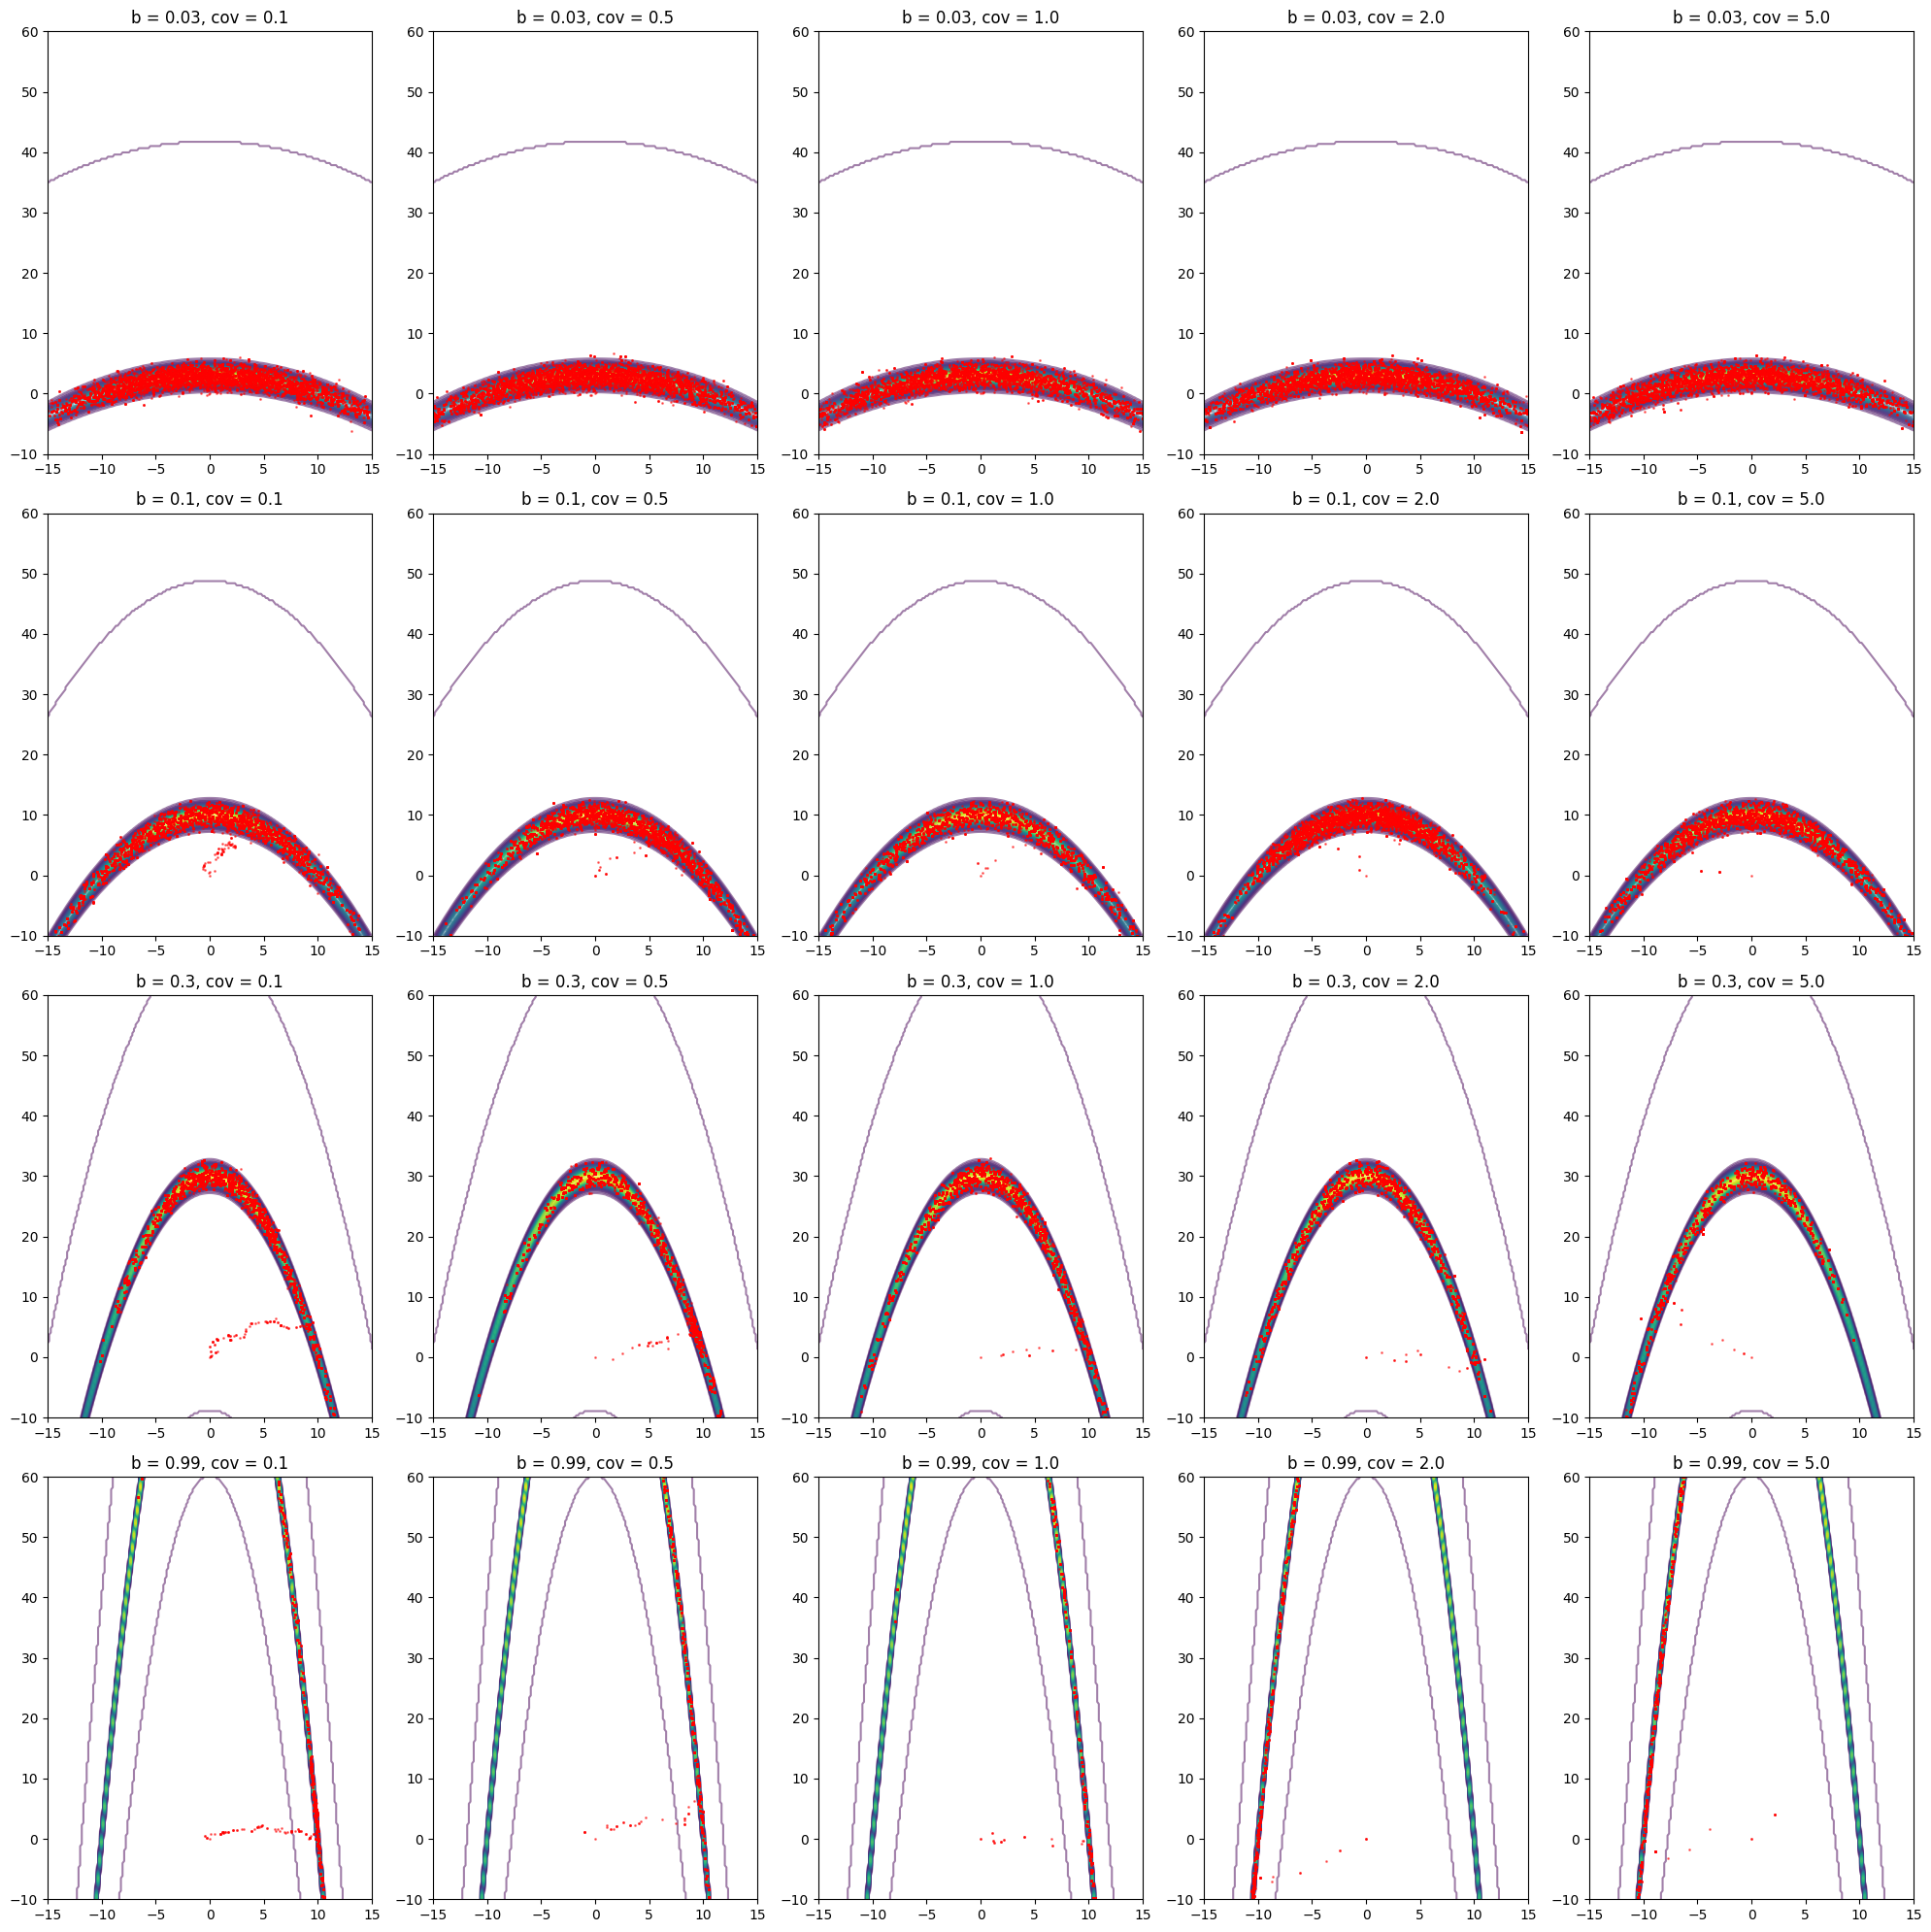

In [23]:
import matplotlib.pyplot as plt

# Define the grid of b values and initial_cov matrices
b_values = [0.03, 0.1, 0.3, 0.99]
initial_cov_values = [0.1 * np.eye(2), 0.5 * np.eye(2), np.eye(2), 2 * np.eye(2), 5 * np.eye(2)]

# Set up the plot grid
fig, axes = plt.subplots(nrows=len(b_values), ncols=len(initial_cov_values), figsize=(20, 20))
x = np.linspace(-15, 15, 200)
y = np.linspace(-10, 60, 200)
X, Y = np.meshgrid(x, y)

# Run DRAM MCMC for each combination of b and initial_cov
for i, b in enumerate(b_values):
    for j, initial_cov in enumerate(initial_cov_values):
        samples = dram_mcmc(n_samples=10000, b=b, initial_x=initial_x, initial_cov=initial_cov)

        # Plot the contour of the banana distribution
        Z = banana_density(X, Y, b)
        axes[i, j].contour(X, Y, Z, levels=50, cmap='viridis', alpha=0.5)

        # Plot the samples
        axes[i, j].plot(samples[:, 0], samples[:, 1], 'r.', markersize=2, alpha=0.5)
        axes[i, j].set_title(f'b = {b}, cov = {initial_cov[0, 0]}')
        axes[i, j].set_xlim([-15, 15])
        axes[i, j].set_ylim([-10, 60])

# Adjust layout
plt.tight_layout()
plt.show()